In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime

In [19]:
#import Manaus.csv
df = pd.read_csv('Old_Manaus.csv', sep=';', encoding='latin-1')

#Limpeza
cleaned_data = df[['_idade','_sexo','_bairro','_classificacao','_conclusao','_dt_notificacao','_teste_pcr','_teste_anticorpo','_teste_antigeno','_teste_igm','_teste_igg','_faixa etária']]
cleaned_data = cleaned_data.dropna()
cleaned_data = cleaned_data.reset_index(drop=True)
df = cleaned_data

#pega o tamanho do data para filtrar a data posteriormente
size = df.size

#filtra somente os casos onde a coclusão é igual a recuperado
df_recovered = df.loc[df['_conclusao'] == 'Recuperado']

C:\Users\luizf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
#obtem somente as colunas _dt_notificacao e _conclusao
date_notification = df_recovered.filter(items=['_dt_notificacao', '_conclusao'])
date_notification

,_dt_notificacao,_conclusao
0,25/04/2020,Recuperado
1,04/05/2020,Recuperado
2,18/04/2020,Recuperado
3,28/04/2020,Recuperado
4,23/04/2020,Recuperado
...,...,...
54653,25/05/2020,Recuperado
54654,04/05/2020,Recuperado
54655,05/06/2020,Recuperado
54656,03/04/2020,Recuperado


In [21]:
#agora somente a coluna _dt_notificação
date_notification = df_recovered.filter(items=['_dt_notificacao'])
date_notification

,_dt_notificacao
0,25/04/2020
1,04/05/2020
2,18/04/2020
3,28/04/2020
4,23/04/2020
...,...
54653,25/05/2020
54654,04/05/2020
54655,05/06/2020
54656,03/04/2020


In [25]:
#função que vai filtrar todos os casos entre a partir de 03/08
def verifica_data(data):
    d = int(data[0:2])
    m = int(data[3:5])
    y = int(data[6:])
    
    data = datetime.date(y, m, d)
    often10days  = datetime.date(2020, 8, 3)
    
    return often10days<=data

for i in range (size):
    try:
        if(not(verifica_data(date_notification['_dt_notificacao'][i]))):
            date_notification['_dt_notificacao'][i] = 'Invalido'
    except:
        continue
        
new_date_notification = date_notification.loc[date_notification['_dt_notificacao'] != 'Invalido']

In [26]:
order = new_date_notification['_dt_notificacao'].value_counts()

In [27]:
date = order.index
case = order.values

list_of_tuples = list(zip(date, case))
date_of_case = pd.DataFrame(list_of_tuples, columns = ['Datas', 'Casos'])

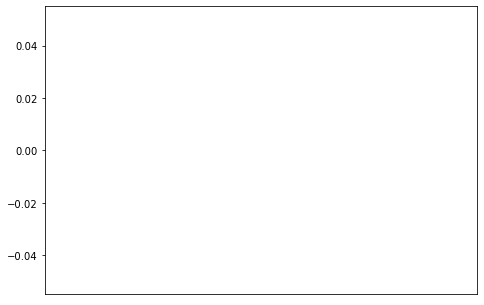

In [28]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(date_of_case['Datas'], date_of_case['Casos'])


plt.xticks(date_of_case['Datas'], rotation=90)
plt.show()